<a href="https://colab.research.google.com/github/Zainaazar/Algorithms/blob/main/Clustering_Mushroom_Data_K_Means_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

## 🍄 Unsupervised Clustering of the Mushroom Dataset

This project demonstrates the application of unsupervised machine learning techniques—**K-Means Clustering** and **Principal Component Analysis (PCA)**—to explore the inherent structure of the highly categorical UCI Mushroom dataset.

### 🎯 Objective: Discovering Structure

The goal is to see if an unsupervised model (K-Means), without ever being shown the "edible" or "poisonous" labels, can naturally divide the mushrooms into two groups that correspond to the underlying toxicity classes.

---

### ⚙️ The Technical Workflow

#### 1. Data Preprocessing

* **Handling Categorical Features:** The dataset consists entirely of nominal (categorical) features (e.g., 'cap-shape', 'odor', 'gill-color').
* **One-Hot Encoding:** These features were converted into a numerical format using **One-Hot Encoding**. This process creates a new binary column for every unique category, resulting in a **high-dimensional feature space**.

#### 2. Clustering

* **K-Means Algorithm:** We applied **K-Means** with $k=2$ clusters. This algorithm partitions the data into two distinct, non-overlapping subgroups based on feature similarity.
* The resulting cluster assignments (`cl`) represent the model's best guess at separating the data into two principal categories.

---

### 📊 Visualization with Dimensionality Reduction

#### Principal Component Analysis (PCA)

* The data has too many dimensions (features) after One-Hot Encoding to be plotted directly.
* **PCA** was used to reduce the dimensionality from over 100 features down to just **two Principal Components (PC1 and PC2)**.
* These two components capture the **maximum possible variance** (the most important patterns) in the original high-dimensional data.

#### Interpretation of the Plot

* The scatter plot shows the mushroom samples projected onto the PC1 and PC2 axes.
* Points are colored according to the **cluster assignment** (`cl`) determined by K-Means.
* **Strong Separation** between the two color groups indicates that K-Means successfully identified two major, distinct groups in the data, which likely corresponds to the underlying poisonous/edible characteristics.

Imports

In [4]:
pip install ucimlrepo

In [5]:
# Importing Libraries
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Algorithm
from sklearn.decomposition import PCA

Data Fetching and Cleaning

In [6]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features

# Remove rows containing the missing value '?'
X = X[~X.isin(['?']).any(axis=1)]

# Drop the stalk-root column, as it has many missing values
X = X.drop('stalk-root', axis=1)

# Display the first few rows of the cleaned data
print("Cleaned Data Head:")
print(X.head())

Cleaned Data Head:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w 

Encoding and Clustering

In [7]:
# One-Hot Encoding
# Converts all categorical features into a numerical matrix
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
xE = encoder.fit_transform(X)

# K-Means Clustering (k=2 for edible/poisonous distinction)
model = KMeans(n_clusters=2, random_state=42, n_init=10)
cl = model.fit_predict(xE)

# Store the cluster assignments
mushroom["Cluster"] = cl
print(f"\nNumber of Features after One-Hot Encoding: {xE.shape[1]}")


Number of Features after One-Hot Encoding: 112


PCA and Visualization

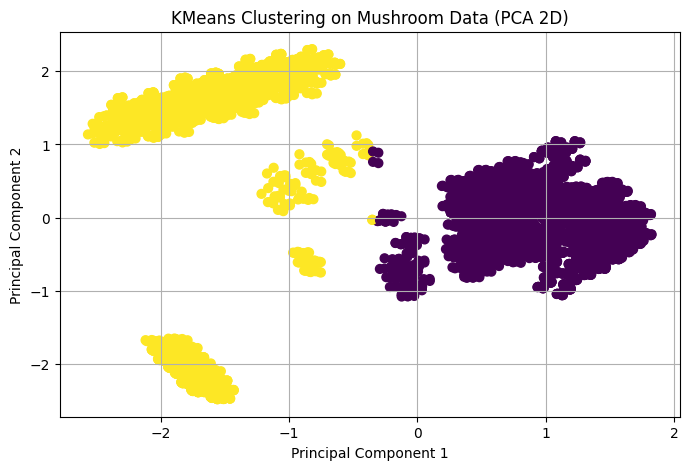

In [8]:
# Dimensionality Reduction (PCA to 2 components for visualization)
p = PCA(n_components=2)
xP = p.fit_transform(xE)

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(xP[:,0],xP[:,1], c=cl, cmap="viridis", s=40)
plt.title("KMeans Clustering on Mushroom Data (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()